# Data Prep

In [24]:
import pandas as pd 
import numpy as np
import os

In [25]:
os.chdir('..')

In [26]:
from src.data_prep import standardize_column_names , missing_report , impute_missing , show_outliers , fix_outliers , convert_columns_to_numeric
from db.db_connection import connect_db , close_db 
from db.db_processes import fetch_all , create_table , push_dataframe

In [27]:
# connect to the database to start 
conn =  connect_db()

Connected to Postgres!


In [28]:
# fetch all table data 
data = fetch_all(conn=conn , table_name= 'social_media_users')


In [29]:
data.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.1809,Facebook,61,6.7536,8.0405,7.2916,4.0,5.1165,0.4191,8,False,False,4,11,21.9271,6.3367
1,46,Male,Health,3.2496,Twitter,59,9.1693,5.0634,5.1651,7.0,5.1039,0.6715,7,True,True,2,25,0.0000,3.4124
2,32,Male,Finance,None,Twitter,57,7.9110,3.8618,3.4741,4.0,8.5832,0.6244,0,True,False,3,17,10.3220,2.4749
3,60,Female,Unemployed,None,Facebook,59,6.3550,2.9163,1.7749,6.0,6.0530,1.2045,1,False,False,0,4,23.8766,1.7337
4,25,Male,IT,None,Telegram,66,6.2141,8.8688,None,7.0,5.4057,1.8763,1,False,True,1,30,10.6535,9.6931


In [30]:
# standardize column name 
standardized_data = standardize_column_names(df= data)

In [31]:
# missing value report 

missing_data_report= missing_report(df= standardized_data)
missing_data_report  

,n_missing,p_missing
daily_social_media_time,2765,0.092
job_satisfaction_score,2730,0.091
sleep_hours,2598,0.087
actual_productivity_score,2365,0.079
screen_time_before_sleep,2211,0.074
stress_level,1904,0.063
perceived_productivity_score,1614,0.054
job_type,0,0.000
gender,0,0.000
age,0,0.000


In [32]:
# handle missing data
cleaned_data = impute_missing(df= standardized_data)

/home/mullan/Documents/Projects DA/social-media-productivity-prediction/src/data_prep.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_target[col].fillna(val, inplace=True)


In [33]:
check_for_missing_values = missing_report(df=cleaned_data)
check_for_missing_values

,n_missing,p_missing
age,0,0.0
gender,0,0.0
job_type,0,0.0
daily_social_media_time,0,0.0
social_platform_preference,0,0.0
number_of_notifications,0,0.0
work_hours_per_day,0,0.0
perceived_productivity_score,0,0.0
actual_productivity_score,0,0.0
stress_level,0,0.0


In [34]:
cleaned_data.dtypes

age                                int64
gender                            object
job_type                          object
daily_social_media_time           object
social_platform_preference        object
number_of_notifications            int64
work_hours_per_day                object
perceived_productivity_score      object
actual_productivity_score         object
stress_level                      object
sleep_hours                       object
screen_time_before_sleep          object
breaks_during_work                 int64
uses_focus_apps                     bool
has_digital_wellbeing_enabled       bool
coffee_consumption_per_day         int64
days_feeling_burnout_per_month     int64
weekly_offline_hours              object
job_satisfaction_score            object
dtype: object

In [35]:
#change the data type of some columns to numeric 

cleaned_data= convert_columns_to_numeric(df= cleaned_data , columns= ['daily_social_media_time','number_of_notifications','breaks_during_work','work_hours_per_day', 'weekly_offline_hours', 'sleep_hours','coffee_consumption_per_day','days_feeling_burnout_per_month','job_satisfaction_score','stress_level','actual_productivity_score','perceived_productivity_score','screen_time_before_sleep',])
cleaned_data.dtypes

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

### check for outliers using box plots

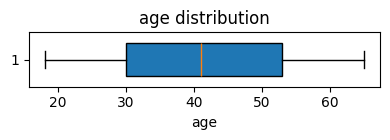

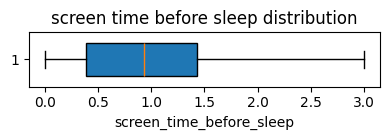

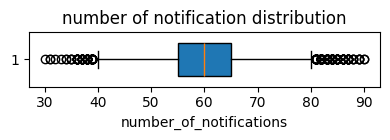

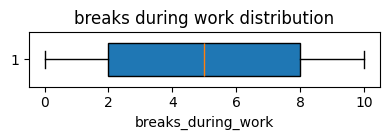

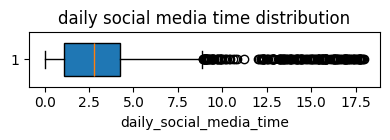

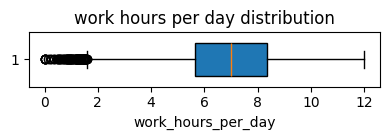

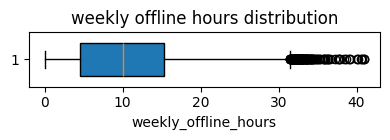

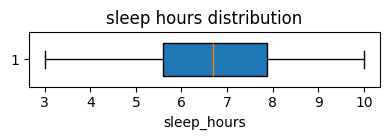

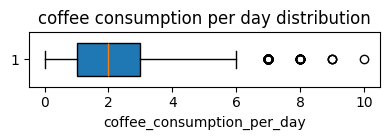

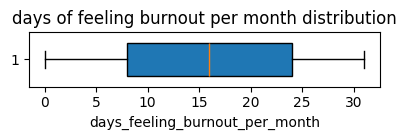

Series([], Name: days_feeling_burnout_per_month, dtype: int64)

In [36]:
show_outliers(series=cleaned_data['age'] ,title="age distribution",)
show_outliers(series= cleaned_data['screen_time_before_sleep'] ,title="screen time before sleep distribution",)
show_outliers(series=cleaned_data['number_of_notifications'] , title= "number of notification distribution")
show_outliers(series= cleaned_data['breaks_during_work'] , title="breaks during work distribution",)
show_outliers(series= cleaned_data['daily_social_media_time'] , title="daily social media time distribution",)
show_outliers(series= cleaned_data['work_hours_per_day'], title="work hours per day distribution",)
show_outliers(series= cleaned_data['weekly_offline_hours'] , title="weekly offline hours distribution",)
show_outliers(series= cleaned_data['sleep_hours'] , title="sleep hours distribution",)
show_outliers(series= cleaned_data['coffee_consumption_per_day'] , title="coffee consumption per day distribution",)
show_outliers(series= cleaned_data['days_feeling_burnout_per_month'] , title="days of feeling burnout per month distribution",)

# fix outliers 
#### - the outliers found in the daily social media time distribution are assumed to be genuine behaviours of our users so we won't be imputing them or removing them , they will be kept as they are. 
#### - the outliers found in the work ours per day will be kept as it is assumed genuine, for the data set includes students who have no real working hours.
#### - the outliers in the `coffee_consumption_per_day` columns will be dropped as they have no significance on out analysis becasuse they are very numbered 


In [42]:
# fix outliers 
fixed_outlier_data = fix_outliers( df=cleaned_data, column= 'coffee_consumption_per_day', method='remove')
fixed_outlier_data =  fix_outliers(df= fixed_outlier_data, column='weekly_offline_hours', method='median')

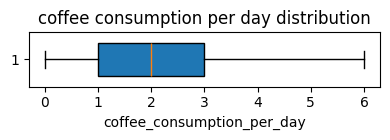

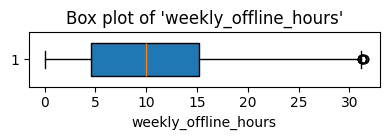

34       31.2168
7961     31.2396
9291     31.4168
21634    31.4339
23038    31.2448
28068    31.2415
Name: weekly_offline_hours, dtype: float64

In [38]:
# test again to make sure the outlier fix has taken place 
show_outliers(series= pd.to_numeric(fixed_outlier_data['coffee_consumption_per_day']) , title="coffee consumption per day distribution",)
show_outliers(series= fixed_outlier_data['weekly_offline_hours'], )

In [39]:
# store the cleaned data to a new table in the database 
create_table(
    columns= {    
    "age"                    :         "INTEGER",
    "gender"                  :        "VARCHAR(10)",
    "job_type"                 :       "VARCHAR(30)",
    "daily_social_media_time"   :      "NUMERIC(5,1)",   
    "social_platform_preference" :     "VARCHAR(20)",
    "number_of_notifications"     :    "INTEGER",
    "work_hours_per_day"           :   "NUMERIC(4,1)",
    "perceived_productivity_score"  :  "NUMERIC(4,1)",
    "actual_productivity_score"      : "NUMERIC(4,1)",
    "stress_level"                   : "NUMERIC(4,1)",
    "sleep_hours"                    : "NUMERIC(4,1)",
    "screen_time_before_sleep"        :"NUMERIC(4,1)",
    "breaks_during_work"             : "INTEGER",
    "uses_focus_apps"                : "BOOLEAN",
    "has_digital_wellbeing_enabled"  : "BOOLEAN",
    "coffee_consumption_per_day"      : "INTEGER",
    "days_feeling_burnout_per_month"  : "INTEGER",
    "weekly_offline_hours"            : "NUMERIC(4,1)",
    "job_satisfaction_score"          :"NUMERIC(4,1)"
    }, table_name= "Cleaned_social_media_data", conn= conn)


Table 'Cleaned_social_media_data' created


In [41]:
push_dataframe(conn= conn , df= fixed_outlier_data, table_name= 'Cleaned_social_media_data')

🚀 Inserted 29,873 rows into Cleaned_social_media_data


29873